In [655]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

Task 1

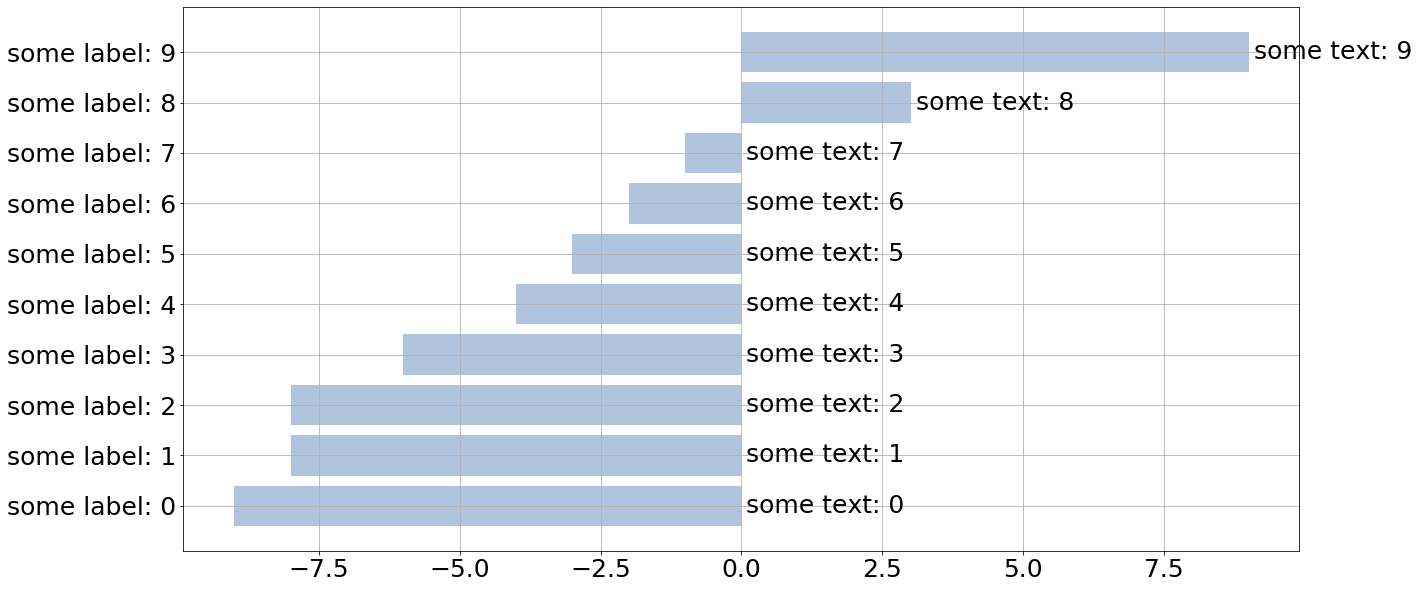

In [184]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

In [182]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, fig):
   
    fig, ax = plt.subplots(1,1,figsize=fig)
    ax.grid(True)
    rects = ax.barh(np.arange(len(bars_length)), bars_length, align='center', color ='lightsteelblue')
    ax.set_yticklabels(yticks_labels, fontsize = 25)
    ax.set_yticks(np.arange(len(yticks_labels)))
    for idx,rect in enumerate(rects):
        width = rect.get_width()
        height = rect.get_height()
        if width < 0:
            width = 0
        
        ax.annotate('{}'.format(labels[idx]),
                    xy=(rect.get_x() + width , rect.get_y() +  height/2),
                    xytext=(5, 0), 
                    textcoords="offset points",
                    ha='left', va='center', fontsize = 25)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    return ax

Task 2

In [777]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

In [778]:
def plot_time_probabilities(probabilities_in_time, figsz):
    fig, ax = plt.subplots(figsize=figsz) 
    plt.rcParams["axes.linewidth"] = 1
    plt.rcParams["axes.edgecolor"] = 'k'
    ax.set_facecolor('w')
    ax.grid(True, linewidth = 0.5, color = 'grey', axis = 'x')
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(probabilities_in_time.index[0] - pd.Timedelta('0.5Y'), probabilities_in_time.index[208] +pd.Timedelta('0.3Y'))
    ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 3,    #  Длина делений
               width = 1,     #  Ширина делений
               color = 'k',    #  Цвет делений
               pad = 5,    #  Расстояние между черточкой и ее подписью
               labelsize = 13,    #  Размер подписи
               labelcolor = 'k',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  и справа
               labelbottom = True,    #  Рисуем подписи снизуа
               labelleft = True,
                  )  
    plt.yticks(fontname = "Sans")
    plt.xticks(fontname = "Sans")
    
    ax.spines['bottom'].set_color('0.5')
    ax.spines['top'].set_color('0.5')
    ax.spines['right'].set_color('0.5')
    ax.spines['left'].set_color('0.5')
    
    font1 = {'family' : 'Sans',  
                'weight' : 'normal',  
            'size'   : 13
    } 
    
    col = sns.color_palette("RdBu_r", 10)
    stack = ax.stackplot(probabilities_in_time.index,probabilities_in_time.iloc[0:209,:].T, colors=col, ec= 'k', lw = 0.1)
    proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=pol.get_facecolor()[0], lw = 0.1, ec = 'k' ) 
    for pol in stack]
    vol = ['Probability: {}'.format(i) for i in range (0,10)]
    
    ax.legend(proxy, vol,prop = font1, loc='upper left', bbox_to_anchor=(0.01,1), ncol = 1, framealpha = 0.9)
    
    return ax

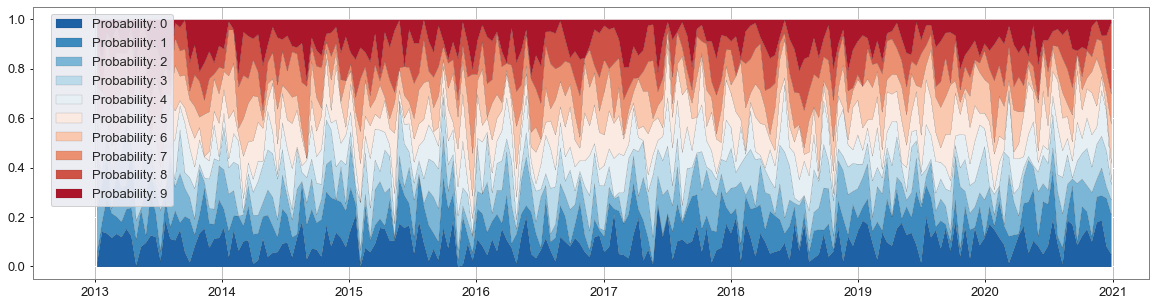

In [779]:
plot_time_probabilities(probabilities_in_time, figsize)

Task 3

In [427]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 5)

In [791]:
def plot_intraday_ts(intraday_ts, figsz):
    
   # plt.rcParams["axes.axisbelow"] = False
    fig, ax = plt.subplots(figsize=figsz) 
    
    series_day = np.zeros((int(intraday_ts.size/24+1),24))
    for date in range (0, len(intraday_ts), 24):
        series_day[int(date/24)] = pd.Series(intraday_ts[date:date+24])
        
    sns.set(rc={'figure.facecolor':'white', 'figure.figsize':figsz})
    
    heat = sns.heatmap(series_day.T, cmap = 'RdBu_r',linewidth = 0.5, cbar_kws = dict(use_gridspec=False,location="left" ))
    ax.set_ylabel('Время', fontsize = 15)
    ax.set_xlabel('Дата', fontsize = 15)
    ax.set_yticklabels(pd.date_range("00:00", "23:00", freq='2H').strftime('%H:%M'), rotation = 360)
    ax.set_xticklabels(pd.date_range(intraday_ts.index[24], intraday_ts.index[intraday_ts.size - 1], freq = '2D').strftime('%B %d'), rotation = 45)
    #ax.yaxis.set_major_locator(plt.MaxNLocator(13))
    ax.yaxis.set_ticks(np.arange(0, 24, 2))
    
    heat.invert_yaxis()
    ax.set_ylim(-0.1, 24.01)
    ax.set_xlim(-0.0, series_day.shape[0]+0.2)
    
    ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 5,    #  Длина делений
               width = 1,     #  Ширина делений
               color = 'k',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               labelcolor = 'k',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               right = True,    #  и справа
               labelbottom = True,    #  Рисуем подписи снизуа
               labelright = True,
               labelleft = False,
                  )  
    ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=series_day.shape[1], color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=series_day.shape[0], color='k',linewidth=1)
    return ax
    

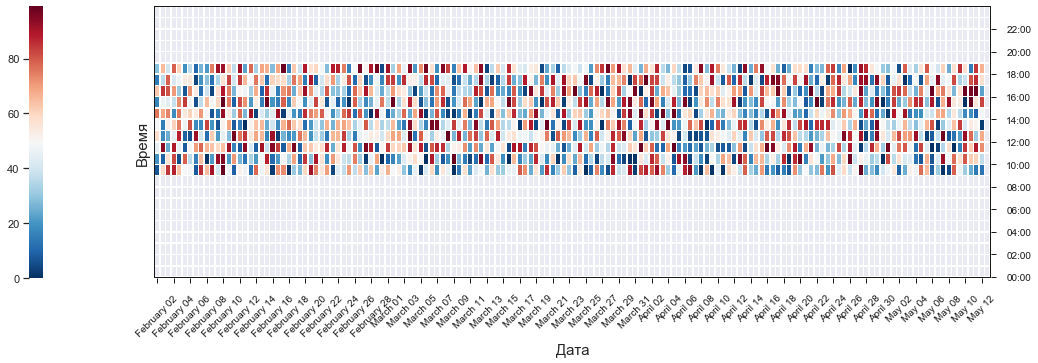

In [793]:
plot_intraday_ts(intraday_ts, figsize)